
# Machine Learning Internship task

Welcome folks, Thank you for applying for this internship and we are super excited to take this conversation ahead with you.

But before we go ahead, we would like you to go thru a small assessment, which will help us to evaluate you better on technical skills and working styles.


## Task Objective :
* [ ] Perform EDA on the given [data](https://github.com/geniusai-research/interns_task/blob/main/taskdata.csv).
* [ ] Build some new features which makes sense for the learning objective.
* [ ] Train any classifier (can be any model of your choice XGB,DNNs, etc) 
* [ ] Implement SHAP on this model to explain the decisions. (`Bonus points`) 
* [ ] Submit the task by creating a PR request on this [repository](https://github.com/geniusai-research/interns_task/).

## Instructions :
* Perform all the tasks mentioned above.
* Maintain a single **JupyterNotebook** which has all the descriptions and code in it. 
* Notebook needs to be properly structured .
* Code needs to reproducible.

**We will only accept the assignment if its in a single Notebook or else it will be rejected.**

## Important dates
The assignments needs to be completed in 1 week from today. <br>
**Deadline : 28th October**


If you have any issue then feel free to create issue on this [repository](https://github.com/geniusai-research/interns_task/) or reachout to us over the internshala chat.

<hr>

Cheers!!!  <br>
RK 


### Import necessary module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### import scaling module 

In [2]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#### Import  all machine learning and deep learning tensorflow keras

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



from keras.layers.recurrent import LSTM,SimpleRNN
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


### Read CSV data as pd.read_csv()

In [4]:
data_df= pd.read_csv('taskdata.csv')

### Top five rows of data

In [5]:
data_df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


### Rows and columns of data

In [6]:
data_df.shape

(4407, 17)

## EDA using python

#### Data description

In [7]:
data_df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


#### Information of data

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
user_id                  4407 non-null int64
account_id               4400 non-null float64
max_return_days          4407 non-null int64
average_return_days      4407 non-null float64
customer_since_months    4407 non-null int64
total_revenue            4407 non-null float64
average_revenue          4407 non-null float64
avg_vas_count            4407 non-null float64
avg_used_vas_value       4407 non-null float64
business_type            4407 non-null int64
avg_wallet_bonus         4407 non-null float64
avg_active_ads           4407 non-null float64
avg_new_ads              4407 non-null float64
avg_email_replies        4407 non-null float64
avg_call_replies         4407 non-null float64
avg_sms_replies          4407 non-null float64
target                   4407 non-null int64
dtypes: float64(12), int64(5)
memory usage: 585.4 KB


* According to our data only column name account_id contain some null value  

#### Fill value "0" to all null value exists in account_id column 

In [9]:
data_df['account_id']=data_df['account_id'].fillna(0)

In [10]:
# represent all no_account mention or '0' accaount_id 
data_df[data_df['account_id']==0]

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
764,61519179,0.0,2,1.066667,15,0.0,0.0,3.1,73.0,0,400.0,82.4,13.0,11.0,11.5,0.0,0
1002,614367929,0.0,31,31.000000,1,0.0,0.0,0.0,0.0,0,0.0,288.0,288.0,33.0,32.0,0.0,0
2276,734097700,0.0,1,1.000000,1,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0
3792,7334120726,0.0,1,1.000000,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3967,7341075676,0.0,1,1.000000,1,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0
4148,7348949046,0.0,1,1.000000,2,0.0,0.0,0.0,0.0,0,0.0,4.5,3.0,2.0,1.0,0.0,1
4259,7351952873,0.0,1,1.000000,2,0.0,0.0,0.0,0.0,1,0.0,7.0,3.5,1.5,1.5,0.0,0


### There are only 6 unique  business_type ranges   from 0 to 5

In [11]:
data_df['business_type'].unique()

array([0, 3, 5, 1, 4, 2], dtype=int64)

### All unique account_id mention in the data

In [12]:
data_df['account_id'].unique()

array([ 496.,  499.,  493.,  262.,  113., 1005., 1017.,  112.,  111.,
        364.,  202.,  517.,  226.,  116.,    0.,  115.])

### Diagram representaion of account_id mention in the data

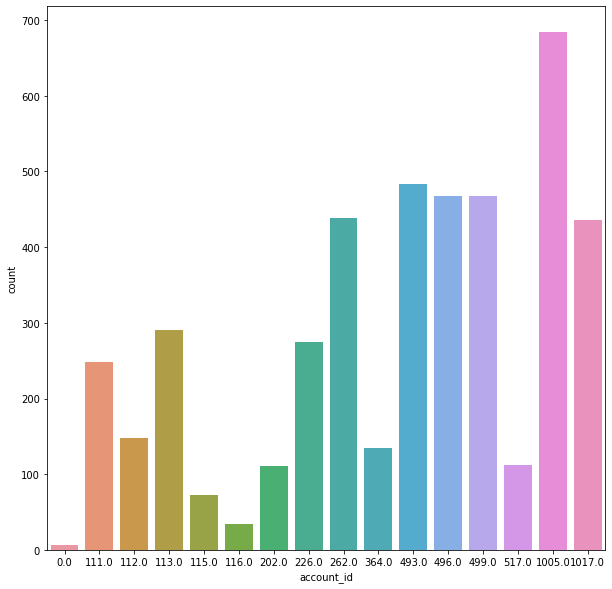

In [13]:
plt.figure(figsize=[10,10])
sns.countplot(data_df['account_id'])

* Account id =100.5 define maximum rows while null or '0' account id are few rows 

### Digram representation of business_type column

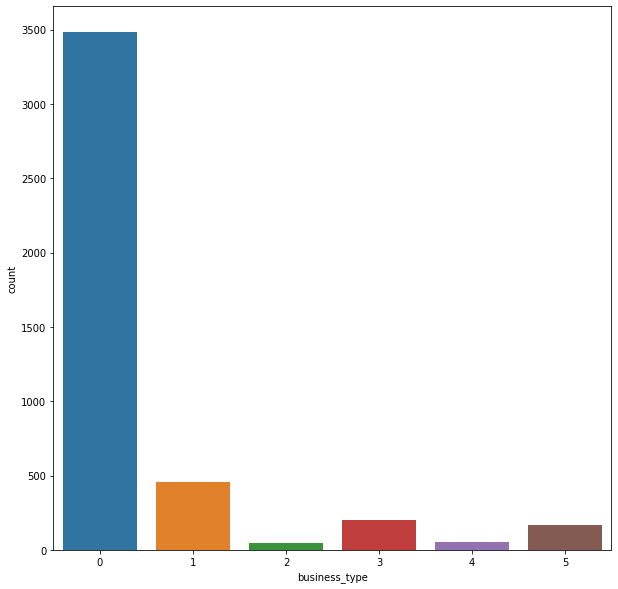

In [14]:
plt.figure(figsize=[10,10])
sns.countplot(data_df['business_type'])

* Here only  business_type =0 consists max no of rows

### Grouping of data

Grouping of data according to **account_id** and sort in descending order of mean value in **target** column

In [15]:
data_df.groupby(['account_id']).mean().sort_values('target',ascending=False)

,user_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
account_id,,,,,,,,,,,,,,,,
115.0,6.115080e+09,35.109589,23.225792,3.479452,0.000000,0.000000,0.058531,1.143213,0.684932,8.219178,5.993293,4.121395,1.169361,0.762374,0.012557,0.506849
1017.0,6.063802e+09,52.006881,17.429941,4.727064,24.559741,5.067308,0.903996,18.081312,0.690367,71.371766,50.315691,19.910793,10.985714,11.010141,0.070759,0.233945
226.0,5.754454e+09,29.065455,11.485134,4.352727,14.528145,3.959819,0.835315,16.412891,0.549091,66.025636,36.363632,12.789952,12.314892,10.441858,0.079087,0.218182
1005.0,4.452284e+09,27.511696,7.626303,10.222222,131.032896,9.472965,2.767685,59.280691,0.328947,257.481930,65.738425,10.874464,20.006233,20.875483,0.124324,0.144737
0.0,4.398012e+09,5.428571,5.295238,3.285714,0.000000,0.000000,0.442857,10.428571,1.285714,57.142857,54.557143,43.928571,6.785714,6.571429,0.000000,0.142857
517.0,3.767219e+09,31.625000,10.463901,7.491071,44.766522,5.187686,3.434607,74.825856,0.580357,133.968929,117.986870,25.118301,21.901275,21.839603,0.122375,0.089286
116.0,4.070598e+09,8.970588,4.705279,2.647059,83.129474,60.697482,0.844188,19.324230,1.411765,10.000000,31.096639,12.753151,19.775910,22.484244,0.317927,0.088235
493.0,3.533990e+09,18.602484,5.454846,11.619048,170.376729,15.205316,3.576368,80.700522,0.383023,364.813810,77.351936,12.289079,24.575019,28.209383,0.169055,0.074534
111.0,3.063956e+09,17.443548,3.341883,12.326613,447.970210,38.319862,4.475123,102.814117,0.306452,675.896210,204.052403,30.773845,37.766449,42.609172,0.144036,0.068548


Grouping of **account_id** and there **business_type** according to the mean value.

In [16]:
data_df.groupby(['account_id','business_type']).mean().head(10)

user_id  max_return_days  average_return_days  \
account_id business_type                                                       
0.0        0              3.839739e+09         8.750000             8.516667   
           1              7.351953e+09         1.000000             1.000000   
           4              4.037587e+09         1.000000             1.000000   
111.0      0              2.591060e+09        19.492228             3.163043   
           1              4.187258e+09        14.702703             5.391526   
           2              6.465846e+09         1.133333             1.055556   
           3              2.623419e+09         1.000000             1.000000   
112.0      0              4.367308e+09         6.678571             1.771508   
           1              5.048285e+09        17.259259             4.285494   
           2              6.243411e+09         1.000000             1.000000   

                          customer_since_months  total_revenue  \
account_id business_type                                         
0.0        0                           4.750000       0.000000   
           1                           2.000000       0.000000   
           4                           1.000000       0.000000   
111.0      0                          13.564767     491.397384   
           1                           9.432432     115.076130   
           2                           3.733333       0.000000   
           3                          11.333333    3999.700000   
112.0      0                          12.187500    1473.764053   
           1                           6.592593     110.861822   
           2                           3.666667       0.000000   

                          average_revenue  avg_vas_count  avg_used_vas_value  \
account_id business_type                                                       
0.0        0                     0.000000       0.775000           18.250000   
           1                     0.000000       0.000000            0.000000   
           4                     0.000000       0.000000            0.000000   
111.0      0                    42.164390       5.316706          122.629805   
           1                     7.426247       1.676330           34.484820   
           2                     0.000000       0.271111            6.088889   
           3                   363.609091       5.871795          154.358974   
112.0      0                   125.638765       9.302995          200.405787   
           1                    10.660101       0.923876           20.082779   
           2                     0.000000       1.527778           30.555556   

                          avg_wallet_bonus  avg_active_ads  avg_new_ads  \
account_id business_type                                                  
0.0        0                    100.000000       93.725000    76.000000   
           1                      0.000000        7.000000     3.500000   
           4                      0.000000        0.000000     0.000000   
111.0      0                    797.824249      227.339319    30.551549   
           1                    106.275135       25.989129     9.112968   
           2                     60.666667      116.342222    76.131111   
           3                   2933.333333     1340.592075    85.439394   
112.0      0                   1034.343036      355.392394    58.292823   
           1                     27.820370       10.017411     3.214649   
           2                      0.000000      307.138889   108.805556   

                          avg_email_replies  avg_call_replies  \
account_id business_type                                        
0.0        0                      11.500000         11.125000   
           1                       1.500000          1.500000   
           4                       0.000000          0.000000   
111.0      0                      43.588119         49.329249   
           1             

Grouping of data column like  **account_id** and **business_type** represent with mean value of other  and sort in descending order of  **target** column

In [17]:
data_df.groupby(['account_id','business_type']).mean().sort_values('target',ascending=False).head()

,,user_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
account_id,business_type,,,,,,,,,,,,,,,
115.0,5,7.235469e+09,87.666667,43.222222,5.0,0.0,0.0,0.0,0.0,0.0,0.277778,0.111111,0.333333,0.000000,0.000000,1.0
116.0,2,7.343775e+08,1.000000,1.000000,4.0,0.0,0.0,0.0,0.0,0.0,57.000000,14.250000,27.000000,10.250000,0.000000,1.0
1005.0,2,4.038634e+09,18.000000,4.400000,4.0,0.0,0.0,1.3,39.0,0.0,244.133333,80.333333,10.733333,9.100000,0.000000,1.0
517.0,2,7.339465e+09,1.000000,1.000000,7.0,0.0,0.0,0.0,0.0,0.0,840.000000,183.500000,38.000000,25.333333,0.333333,1.0
499.0,2,7.345472e+08,1.000000,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,53.500000,31.000000,4.000000,4.500000,0.000000,1.0


Grouping of data according to   **account_id** and there **business_type** and count no of  rows for each type

In [18]:
data_df['count']=1
data_df.groupby(['account_id','business_type']).count()['count'].head(10)

account_id  business_type
0.0         0                  4
            1                  1
            4                  2
111.0       0                193
            1                 37
            2                 15
            3                  3
112.0       0                112
            1                 27
            2                  6
Name: count, dtype: int64

As column name **user_id** contain all unique rows  
### No of rows contain target value = 0

In [19]:
data_df.loc[data_df['target']==0,'user_id'].count()

3952

### No of rows contain target value  = 1

In [20]:
data_df.loc[data_df['target']==1,'user_id'].count()

455

### Diagram representation of taget value

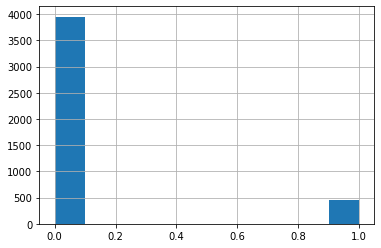

In [21]:
data_df['target'].hist()

Maximum value are **0** and very few  contain **1**

### Represent all of columns names using df.columns

In [22]:
data_df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target',
       'count'],
      dtype='object')

### Dropping all unnnecessary column which are not used in building ml or dl model

In [23]:
my_new_df=data_df.drop(['user_id','account_id','business_type','count'],1)
my_new_df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


### Data Normalization

In [24]:
X_norm = MinMaxScaler()
X_data=X_norm.fit_transform(my_new_df)

data_norm=pd.DataFrame(X_data)
data_norm.head()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.019830,0.002829,0.565217,0.0,0.0,0.023417,0.019856,0.019223,0.008638,0.005852,0.018886,0.016014,0.017081,0.0
1,0.101983,0.021782,0.391304,0.0,0.0,0.031293,0.033954,0.000000,0.025273,0.007022,0.009438,0.007916,0.000000,0.0
2,0.022663,0.002923,0.608696,0.0,0.0,0.034061,0.031770,0.009611,0.005998,0.001439,0.011798,0.014054,0.000000,0.0
3,0.000000,0.001414,0.565217,0.0,0.0,0.040283,0.052466,0.094896,0.044593,0.030994,0.050956,0.033050,0.000000,1.0
4,0.000000,0.001414,0.739130,0.0,0.0,0.037336,0.032533,0.002659,0.005252,0.000649,0.010173,0.014782,0.015767,0.0


### Data Visualization

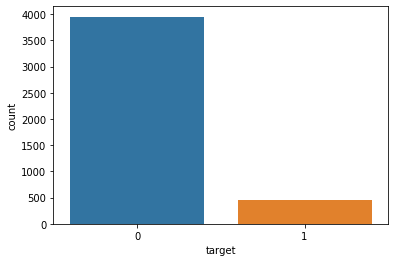

In [25]:
sns.countplot(data_df['target'])

### Histogram chart for each columns

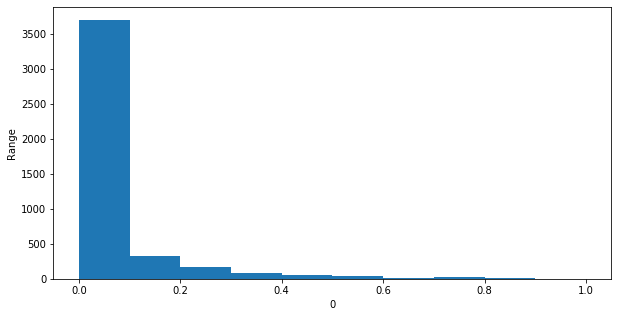

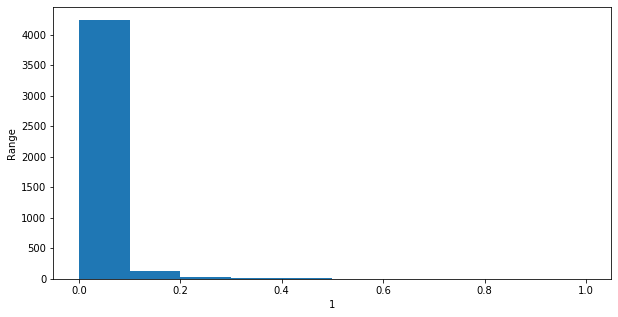

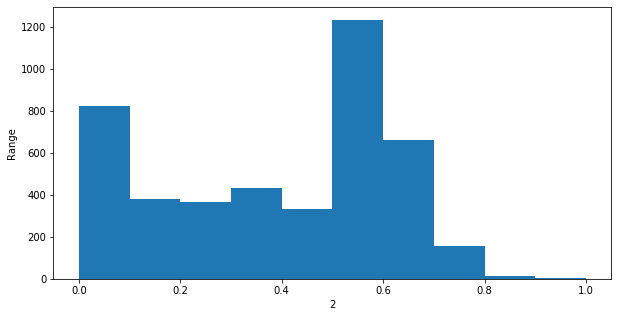

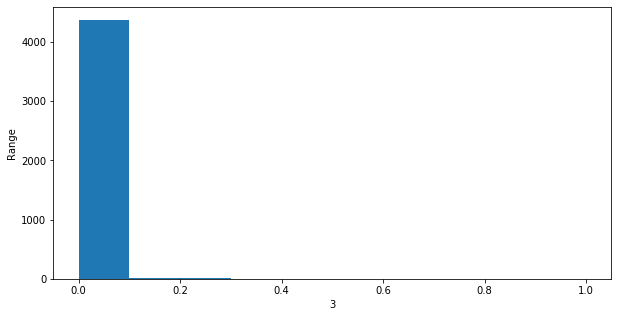

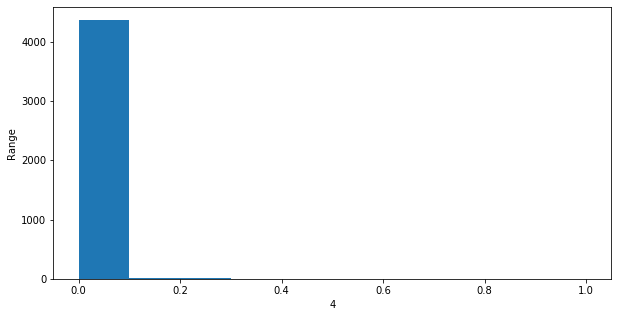

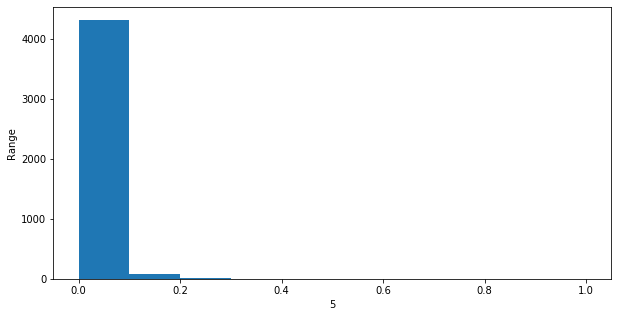

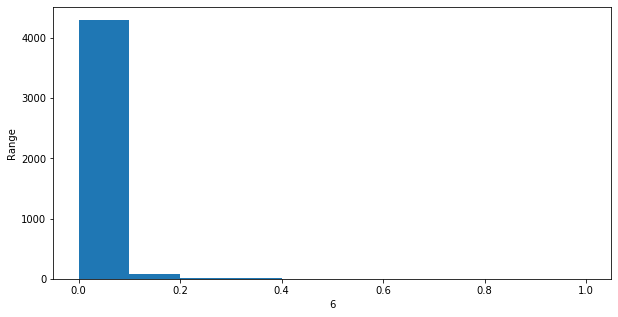

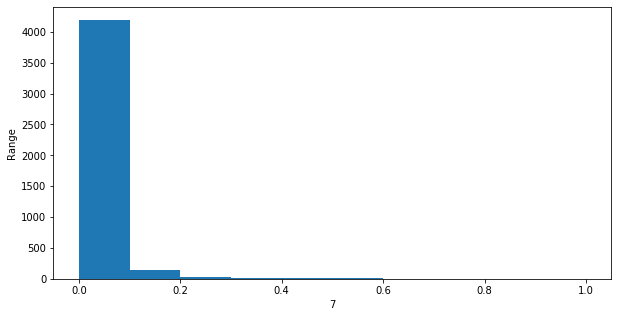

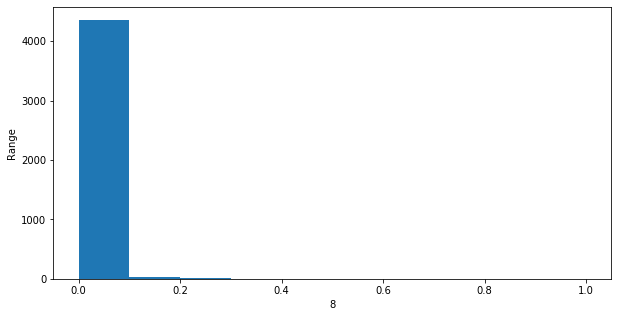

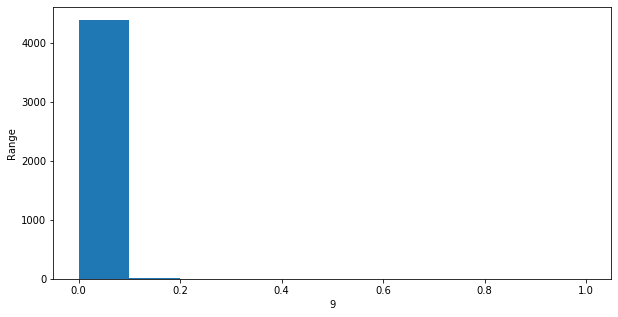

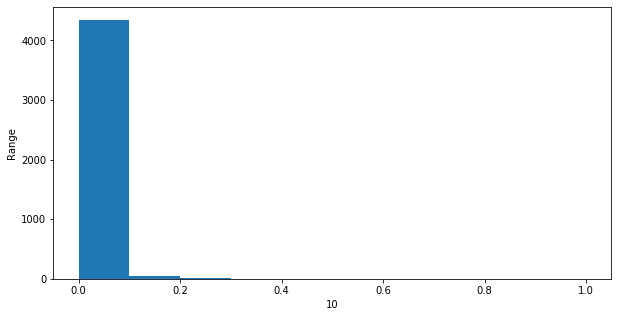

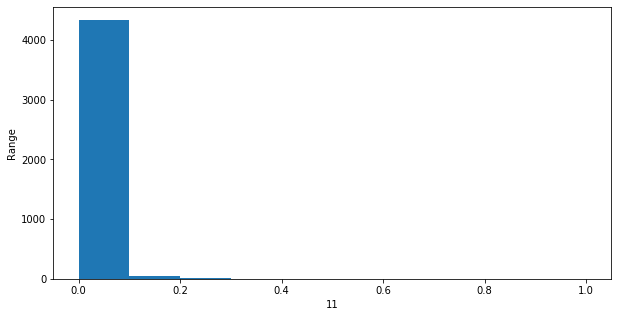

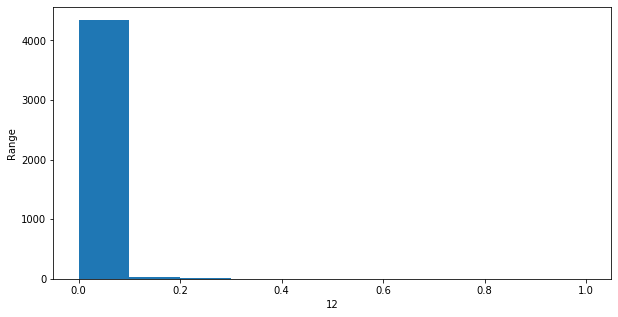

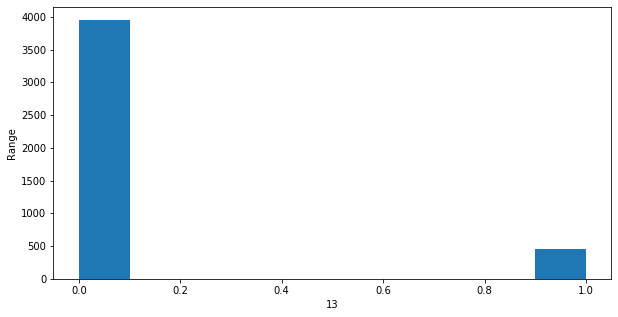

In [26]:
for i in data_norm.columns:
   
    plt.figure(figsize=[10,5])
    plt.hist(data_norm[i])
    plt.xlabel(i)
    plt.ylabel('Range')


Find out outlier exists in the dataset

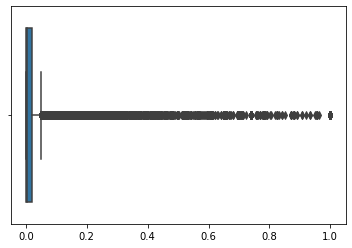

In [27]:
sns.boxplot(data_norm)


### Correlation of data

 * negative correlation
 * positive correlation 
 * no correlation 


In [28]:
data_norm.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.749094,-0.186734,-0.001811,0.013263,-0.112033,-0.118764,-0.131315,-0.042675,-0.008815,-0.075633,-0.079001,-0.050154,0.275005
1,0.749094,1.000000,-0.256605,-0.014424,-0.006545,-0.108025,-0.113959,-0.103527,-0.046713,-0.016387,-0.070537,-0.070755,-0.038732,0.165715
2,-0.186734,-0.256605,1.000000,0.090540,0.063951,0.321568,0.350931,0.352093,0.138861,0.019360,0.206298,0.206565,0.123171,-0.234972
3,-0.001811,-0.014424,0.090540,1.000000,0.950358,0.608588,0.642122,0.075943,0.341777,0.130780,0.214070,0.214298,0.213396,-0.032571
4,0.013263,-0.006545,0.063951,0.950358,1.000000,0.586251,0.612556,0.070069,0.354470,0.132430,0.209710,0.209277,0.214935,-0.025354
5,-0.112033,-0.108025,0.321568,0.608588,0.586251,1.000000,0.962312,0.131268,0.413862,0.191781,0.360756,0.342740,0.240634,-0.117167
6,-0.118764,-0.113959,0.350931,0.642122,0.612556,0.962312,1.000000,0.156331,0.407619,0.185732,0.363019,0.347185,0.244277,-0.128469
7,-0.131315,-0.103527,0.352093,0.075943,0.070069,0.131268,0.156331,1.000000,0.256563,0.121428,0.273858,0.284432,0.237789,-0.076814
8,-0.042675,-0.046713,0.138861,0.341777,0.354470,0.413862,0.407619,0.256563,1.000000,0.650650,0.704178,0.677154,0.433438,-0.021957
9,-0.008815,-0.016387,0.019360,0.130780,0.132430,0.191781,0.185732,0.121428,0.650650,1.000000,0.413364,0.378593,0.260827,0.014184


### Correaltion diagram of given data

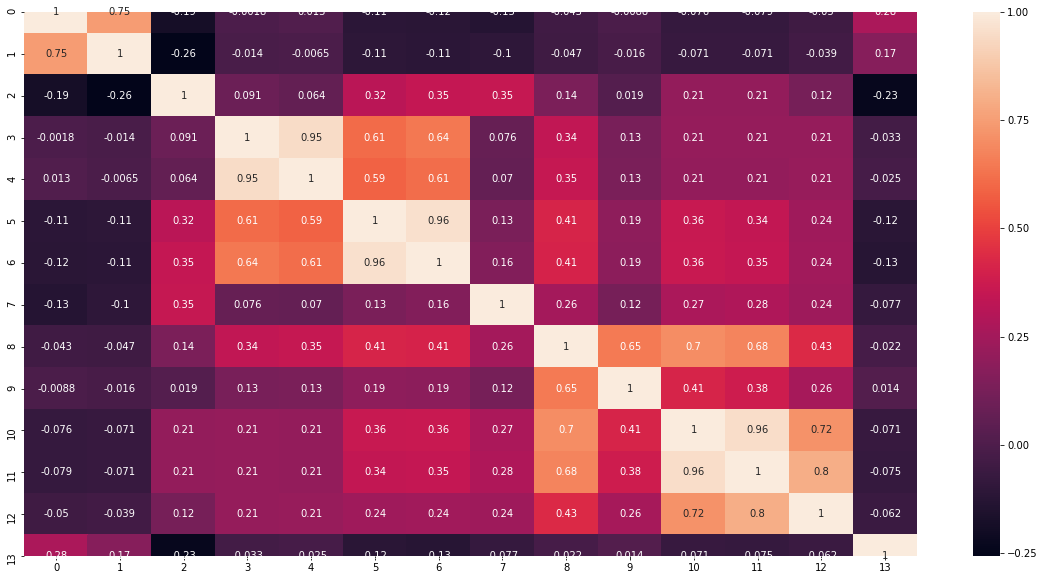

In [29]:
plt.figure(figsize=[20,10])

sns.heatmap(data_norm.corr(),annot=True)# annot = true (print correation value)


### X and Y data for training  the  model 

In [30]:
X=data_norm.drop(13,1)# X contain all value except target
y=data_norm[13]# y contain only target column

### Splitting of training and testing

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)


### Building ml model to fit the data

### Training our model using Other Classifier
* Fitting Machine learning algo and compare there training and testing score
* To check Data underfitting or Overfitting the model by comparing there score.
* In underfitting condition- model accuracy is very low.
* In Overfitting condtion- training accuracy is high but testing accuracy is exponentially low as compare to training.

### Chose the best algo suited for our model
* Find Accuracy score , confusion matrix, classsification report


In [32]:
lr = LogisticRegression()
rfc =RandomForestClassifier(n_estimators=10,max_depth=10)
lsvc = LinearSVC()
gbc = GradientBoostingClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=6)


In [33]:
ml_model = []
ml_model.append(("LogisticRegression",lr))
ml_model.append(('RandomForestClassifier',rfc))
ml_model.append(('GradientBoostingClassifier',gbc))
ml_model.append(('LinearSVC',lsvc))
ml_model.append(('GaussianNB',gnb))
ml_model.append(('KNN',knn))


In [34]:
for name, algo in ml_model:
    algo.fit(X_train,y_train)
    train_score=algo.score(X_train,y_train)
    test_score = algo.score(X_test,y_test)
    msg = "%s = (training score): %f (testing score:) %f"%(name,train_score,test_score)
    print(msg)
    print('\n')


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression = (training score): 0.902128 (testing score:) 0.878685


RandomForestClassifier = (training score): 0.943830 (testing score:) 0.887755


GradientBoostingClassifier = (training score): 0.930496 (testing score:) 0.887755


LinearSVC = (training score): 0.903262 (testing score:) 0.880952


GaussianNB = (training score): 0.387518 (testing score:) 0.395692


KNN = (training score): 0.918014 (testing score:) 0.891156




## KNN gave accurate accuracy  (i.e =89% approx ) neither underfitting nor overfitting the data


In [35]:
# Prediction
from sklearn import metrics
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


In [36]:
print("KNN  Classification_report:",metrics.classification_report(y_test,pred))
print("====================================================================================\n")
print("KNN Confusion Matrix:",metrics.confusion_matrix(y_test, pred))
print("====================================================================================\n")
print("Accuracy",metrics.accuracy_score(y_test,pred))


KNN  Classification_report:               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       774
         1.0       0.65      0.24      0.35       108

   micro avg       0.89      0.89      0.89       882
   macro avg       0.78      0.61      0.65       882
weighted avg       0.87      0.89      0.87       882


KNN Confusion Matrix: [[760  14]
 [ 82  26]]

Accuracy 0.891156462585034


## Deep Neural Network using keras or tensorflow

![](https://groupfuturista.com/blog/wp-content/uploads/2019/03/Artificial-Neural-Networks-Man-vs-Machine.jpeg)


### ANN define by keras using Sequential() method adding no of layers in it
 * Dense layer - define by dnn ,using activation function exponential linear unit (elu) and softmax with shape define columns features=10.
    * Exponential Linear Unit.
 
         * It follows: f(x) =  alpha * (exp(x) - 1.) for x < 0, f(x) = x for x >= 0.
 
         * Input shape
    * Softmax is an activation function. Other activation functions include RELU and Sigmoid. It is frequently used in classifications. Softmax output is large if the score (input called logit) is large. Its output is small if the score is small.


In [37]:
model = Sequential()
model.add(Dense(1000,activation='elu',input_shape = (13,)))
model.add(Dense(128,activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(100,activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


#### Summarization of neral net.


In [38]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              14000     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
Total params: 165,128
Trainable params: 165,128
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics =['accuracy'])


In [40]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Train on 3525 samples, validate on 882 samples
Epoch 1/10
3525/3525 [==============================] - 2s 550us/step - loss: 0.6329 - accuracy: 0.8933 - val_loss: 0.3222 - val_accuracy: 0.8798
Epoch 2/10
3525/3525 [==============================] - 1s 210us/step - loss: 0.2856 - accuracy: 0.9007 - val_loss: 0.3988 - val_accuracy: 0.8798
Epoch 3/10
3525/3525 [==============================] - 1s 215us/step - loss: 0.2823 - accuracy: 0.9035 - val_loss: 0.3327 - val_accuracy: 0.8787
Epoch 4/10
3525/3525 [==============================] - 1s 210us/step - loss: 0.2836 - accuracy: 0.9027 - val_loss: 0.3144 - val_accuracy: 0.8798
Epoch 5/10
3525/3525 [==============================] - 1s 239us/step - loss: 0.2766 - accuracy: 0.9044 - val_loss: 0.3164 - val_accuracy: 0.8821
Epoch 6/10
3525/3525 [==============================] - 1s 239us/step - loss: 0.2741 - accuracy: 0.9050 - val_loss: 0.3158 - val_accuracy: 0.8787
Epoch 7/10
3525/3525 [==============================] - 1s 233us/step - loss:

### Visualize the training loss and training validation accuracy 
 * Accuracy for training dataset 
 * Loss reduce 


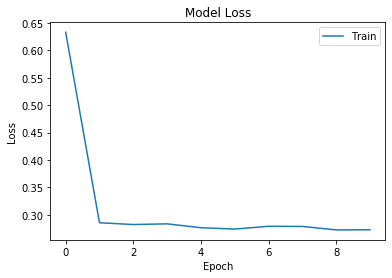

In [41]:
#Visualize the training loss and te validation loss to see if the model is overfitting
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'],loc='upper right')
plt.show()


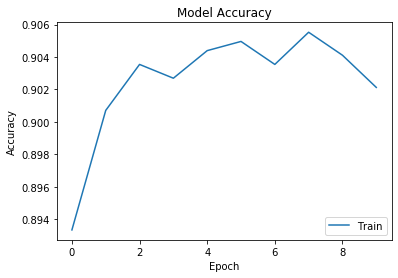

In [42]:
#Visualize the training accuracy and te validation accuracy to see if the model is overfitting
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.show()


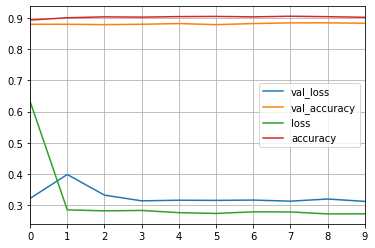

In [43]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim()
plt.show()


### Evaluate the test data

In [44]:
test_acc =model.evaluate(X_test,y_test)


882/882 [==============================] - 0s 83us/step


In [45]:
print("Loss and Accuracy of testing data =",test_acc)


Loss and Accuracy of testing data = [0.31264991744034953, 0.8832199573516846]


### Pridiction of data

In [46]:
predict = model.predict_classes(X_test)


In [47]:
test_predition = pd.DataFrame(predict)


### Confusion Matrix define-:
 * True Negative
 * False Positive
 * False Negative
 * True Positive
         * All diagonal element are correct prediction rest are incorrect 
         * Sum of all correct prediction(diagonal data) divided by sum of all the data(correct or wrong prediction data)


In [48]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predict)


array([[766,   8],
       [ 95,  13]], dtype=int64)

#### Define 
 * precision-:precision is the fraction of relevant instances among the retrieved instances
 * recall:-while recall is the fraction of the total amount of relevant instances that were actually retrieved
 * f1-score-:F1 is an overall measure of a model’s accuracy that combines precision and recall, in that weird way that addition and multiplication just mix two ingredients to make a separate dish altogether


In [49]:
print(metrics.classification_report(y_test,predict))


              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       774
         1.0       0.62      0.12      0.20       108

   micro avg       0.88      0.88      0.88       882
   macro avg       0.75      0.56      0.57       882
weighted avg       0.86      0.88      0.85       882



## Deep Learning  using LSTM (model2)


![](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)


In [50]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
X = np.array(X)


### Reshaping size so our model can fit the lstm layer


In [51]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [52]:
X_train.shape


(3525, 1, 13)

### In sequential model2 we add lstm with dense layers


In [53]:
model2 = Sequential() 
model2.add(LSTM((50), batch_input_shape=(None,1,13),return_sequences=True,init='glorot_normal', inner_init='glorot_normal', activation='elu'))
model2.add(LSTM((20), batch_input_shape=(None,1,13),return_sequences=True,init='glorot_normal', inner_init='glorot_normal', activation='elu'))   
model2.add(LSTM((10), batch_input_shape=(None,1,13),return_sequences=True,init='glorot_normal', inner_init='glorot_normal', activation='elu'))   
model2.add(Dense(30,activation='elu'))
model2.add(Dense(10,activation='elu'))
model2.add(LSTM((1), return_sequences=False))

model2.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, batch_input_shape=(None, 1, ..., return_sequences=True, activation="elu", kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal")`
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(20, batch_input_shape=(None, 1, ..., return_sequences=True, activation="elu", kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, batch_input_shape=(None, 1, ..., return_sequences=True, activation="elu", kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal")`
  after removing the cwd from sys.path.


In [54]:
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             12800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 20)             5680      
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 10)             1240      
_________________________________________________________________
dense_5 (Dense)              (None, 1, 30)             330       
_________________________________________________________________
dense_6 (Dense)              (None, 1, 10)             310       
_________________________________________________________________
lstm_4 (LSTM)                (None, 1)                 48        
Total params: 20,408
Trainable params: 20,408
Non-trainable params: 0
__________________________________________________

In [55]:
model2.fit(X_train, y_train, nb_epoch=10,validation_data=(X_test, y_test))
model2.save('train_LSTM10.h5');
history = model2.fit(X_train, y_train, nb_epoch=10,validation_data=(X_test, y_test))
model2.save('train_LSTM35.h5')


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Train on 3525 samples, validate on 882 samples
Epoch 1/10
3525/3525 [==============================] - 4s 1ms/step - loss: 0.0987 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 2/10
3525/3525 [==============================] - 1s 231us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 3/10
3525/3525 [==============================] - 1s 212us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 4/10
3525/3525 [==============================] - 1s 241us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1226 - val_accuracy: 0.8776
Epoch 5/10
3525/3525 [==============================] - 1s 245us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 6/10
3525/3525 [==============================] - 1s 247us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 7/10
3525/3525 [=========

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


3525/3525 [==============================] - 1s 217us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 2/10
3525/3525 [==============================] - 1s 214us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 3/10
3525/3525 [==============================] - 1s 230us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 4/10
3525/3525 [==============================] - 1s 217us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 5/10
3525/3525 [==============================] - 1s 213us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 6/10
3525/3525 [==============================] - 1s 221us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.8776
Epoch 7/10
3525/3525 [==============================] - 1s 219us/step - loss: 0.0985 - accuracy: 0.9016 - val_loss: 0.1225 - val_accura

* Accuracy improve with large no of epochs

### Visualize the training loss and te validation accuracy to see if the model is overfitting


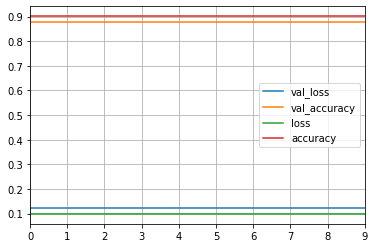

In [56]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim()
plt.show()


* Accuracy of testing data using lstm is low as compare to dense neural network before. 
    * Accuracy- model2 < model
    * Loss - model2 > model 


Evaluate testing model

In [57]:
testing_acc_lstm =model2.evaluate(X_test,y_test)


882/882 [==============================] - 0s 93us/step


In [58]:
print("Loss and Accuracy of testing data =",testing_acc_lstm)


Loss and Accuracy of testing data = [0.12248751127951443, 0.8775510191917419]


### Final conclusion

 * Our model work fine on dense neural network as compare to simple rnn and lstm 
